#Caracterizacion de comentarios turisticos

##Librerias a utilizar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from transformers import DataCollatorWithPadding
from datasets import Dataset
import torch



# Descargar stopwords (palabras vacias)
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

ModuleNotFoundError: No module named 'seaborn'

## Cargue de datos

In [2]:
# Cargar los datos
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

###datos de entrenamiento

In [ ]:
train_data

,id,Comentario,Opinión
0,1,Linda plaza simbólica de la ciudad y su cultur...,neutro
1,2,"Un lugar idílico Muy linda la islita, el hotel...",positivo
2,3,Hice mi curso de buceo Open Water básico (18mt...,positivo
3,4,"Excelente lugar Un paraíso natural de belleza,...",positivo
4,5,Excelente experiencia en Coveñas con mi amigo ...,positivo
...,...,...,...
1138,146,Comentario sintético 145,negativo
1139,147,Comentario sintético 146,negativo
1140,148,Comentario sintético 147,negativo
1141,149,Comentario sintético 148,negativo


### datos de prueba

In [ ]:
test_data

,id,Comentario,Opinión
0,1,Excelente. Recomendado y salir de hay de paseo...,positivo
1,4,"ELHOTELLA FRAGATA, ES EL MEJOR...TIENE HASTABA...",positivo
2,5,Hermosos atardeceres. Rico alquilar una carpa ...,positivo
3,6,Almorzarpescadoydescansaren laplayaes el plan,positivo
4,8,Un lugar para vacacionar? Coveñas es relax total!,positivo
...,...,...,...
393,146,Comentario sintético 145,negativo
394,147,Comentario sintético 146,negativo
395,148,Comentario sintético 147,negativo
396,149,Comentario sintético 148,negativo


## Descripcion de los datos

###Cantidad de comentarios por tipo de opinion

<ipython-input-3-9db949c1d8cc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=opinion_counts.index, y=opinion_counts.values, palette='viridis')


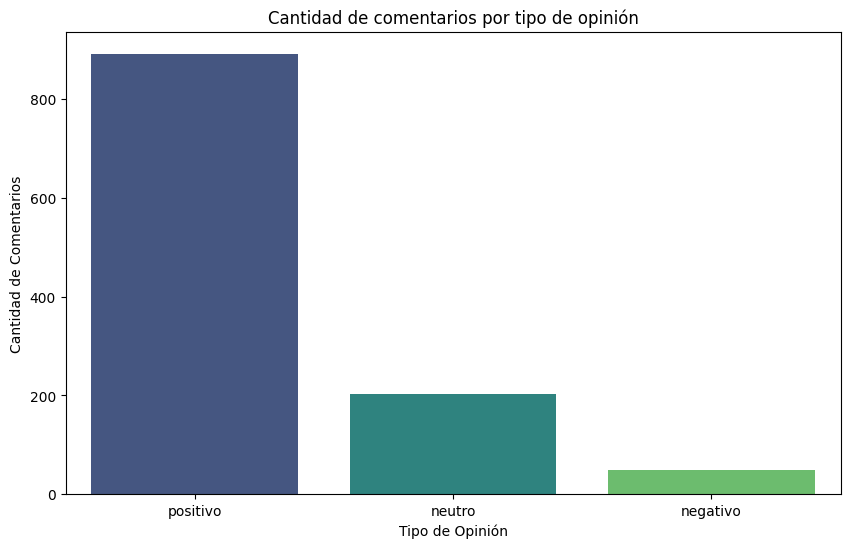

In [3]:
# Contar la cantidad de comentarios por tipo de opinión
opinion_counts = train_data['Opinión'].value_counts()

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=opinion_counts.index, y=opinion_counts.values, palette='viridis')
plt.title('Cantidad de comentarios por tipo de opinión')
plt.xlabel('Tipo de Opinión')
plt.ylabel('Cantidad de Comentarios')
plt.show()

###Palabras mas utilizadas

[('isla', 288), ('lugar', 277), ('experiencia', 201), ('excelente', 187), ('mar', 186), ('buceo', 175), ('playa', 159), ('comentario', 155), ('sintético', 150), ('si', 130)]


<ipython-input-4-46ccdd42caf8>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frecuencia', y='Palabra', data=common_words_df, palette='viridis')


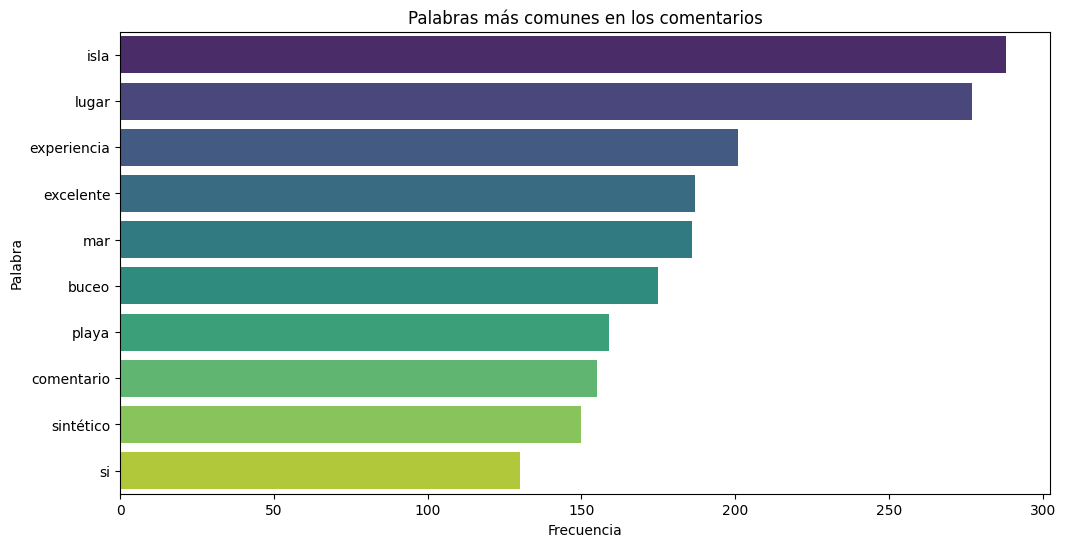

In [4]:
# Combinar todos los comentarios en un solo texto
all_comments = ' '.join(train_data['Comentario'])

# Procesar el texto
  # Convertir a minúsculas
all_comments = all_comments.lower()

  # Eliminar caracteres especiales
all_comments = re.sub(r'[^\w\s]', '', all_comments)

  # Tokenizar las palabras
words = all_comments.split()

# Eliminar palabras vacías (stop words)
filtered_words = [word for word in words if word not in stop_words]

# Contar la frecuencia de cada palabra
word_counts = Counter(filtered_words)

# Mostrar las palabras más comunes
most_common_words = word_counts.most_common(10)
print(most_common_words)


# Convertir a DataFrame para facilitar la visualización
common_words_df = pd.DataFrame(most_common_words, columns=['Palabra', 'Frecuencia'])

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x='Frecuencia', y='Palabra', data=common_words_df, palette='viridis')
plt.title('Palabras más comunes en los comentarios')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.show()

######Cantidad de comentarios por tipo de opinion

In [5]:
# Función para limpiar y tokenizar comentarios
def limpiar_y_tokenizar(comentario):
    comentario = comentario.lower()
    comentario = re.sub(r'[^\w\s]', '', comentario)  # Eliminar caracteres especiales
    palabras = comentario.split()
    palabras = [word for word in palabras if word not in stop_words]
    return ' '.join(palabras)
# Diccionario para almacenar las frecuencias por opinión
frecuencia_palabras_por_opinion = {}

# Iterar sobre cada tipo de opinión
for opinion in train_data['Opinión'].unique():
    comentarios = train_data[train_data['Opinión'] == opinion]['Comentario']
    todas_palabras = []
    for comentario in comentarios:
        todas_palabras.extend(limpiar_y_tokenizar(comentario))
    frecuencia_palabras_por_opinion[opinion] = Counter(todas_palabras)

# Mostrar las 10 palabras más comunes por cada tipo de opinión
for opinion, counter in frecuencia_palabras_por_opinion.items():
    print(f"\n Palabras más comunes en {opinion}:")
    for palabra, cantidad, in counter.most_common(10):
      print(f"{palabra}: {cantidad}")





 Palabras más comunes en neutro:
a: 1227
 : 1226
e: 1113
o: 847
i: 802
n: 676
r: 673
s: 664
c: 607
t: 582

 Palabras más comunes en positivo:
 : 20880
a: 18796
e: 16824
o: 11740
r: 11374
i: 10821
s: 10408
n: 9440
c: 7924
l: 7142

 Palabras más comunes en negativo:
o: 150
t: 150
i: 150
c: 100
n: 100
 : 100
1: 65
m: 50
e: 50
a: 50


##Procesamiento


### Eliminar las palabras vacias de los comnetarios

In [6]:
train_data['Comentario_procesado'] = train_data['Comentario'].apply(limpiar_y_tokenizar)
train_data['Comentario_procesado']

0       linda plaza simbólica ciudad cultura shows pop...
1       lugar idílico linda islita hotel punta faro bu...
2       hice curso buceo open water básico 18mts incre...
3       excelente lugar paraíso natural belleza único ...
4       excelente experiencia coveñas amigo gran instr...
                              ...                        
1138                             comentario sintético 145
1139                             comentario sintético 146
1140                             comentario sintético 147
1141                             comentario sintético 148
1142                             comentario sintético 149
Name: Comentario_procesado, Length: 1143, dtype: object

### Convertir las Etiquetas de Texto a Etiquetas Numéricas en nuestro caso la columna opinion

In [7]:
# Codificar las etiquetas de opinión
label_encoder = LabelEncoder()
train_data['Opinión_coded'] = label_encoder.fit_transform(train_data['Opinión'])
train_data

,id,Comentario,Opinión,Comentario_procesado,Opinión_coded
0,1,Linda plaza simbólica de la ciudad y su cultur...,neutro,linda plaza simbólica ciudad cultura shows pop...,1
1,2,"Un lugar idílico Muy linda la islita, el hotel...",positivo,lugar idílico linda islita hotel punta faro bu...,2
2,3,Hice mi curso de buceo Open Water básico (18mt...,positivo,hice curso buceo open water básico 18mts incre...,2
3,4,"Excelente lugar Un paraíso natural de belleza,...",positivo,excelente lugar paraíso natural belleza único ...,2
4,5,Excelente experiencia en Coveñas con mi amigo ...,positivo,excelente experiencia coveñas amigo gran instr...,2
...,...,...,...,...,...
1138,146,Comentario sintético 145,negativo,comentario sintético 145,0
1139,147,Comentario sintético 146,negativo,comentario sintético 146,0
1140,148,Comentario sintético 147,negativo,comentario sintético 147,0
1141,149,Comentario sintético 148,negativo,comentario sintético 148,0


### Divicion de conjunto de datos de entrenamiento y prueba

In [10]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(train_data['Comentario_procesado'], train_data['Opinión_coded'], test_size=0.2, random_state=42)
# Asegurarse de que X_train y X_test sean Series de pandas
X_train = pd.Series(X_train)
X_test = pd.Series(X_test)


### Inicializar el tokenizador de DistilBERT, que convierte texto en números (tokens) que pueden ser procesados por el modelo de DistilBERT.

In [15]:
# Tokenizar los datos usando DistilBERT
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
# Crear un Dataset compatible con Hugging Face
train_dataset = Dataset.from_pandas(pd.DataFrame({'text': X_train, 'label': y_train}))
test_dataset = Dataset.from_pandas(pd.DataFrame({'text': X_test, 'label': y_test}))


NameError: name 'Dataset' is not defined